In this notebook I'll be working with Emergency Calls data set obtained from montcoalert.org(through Kaggle).This notebook is just me playing with the ml and plotting libraries I have learned recently

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data

In [3]:
df = pd.read_csv('911.csv')

#### Exploring data

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


* 911 calls from different towns

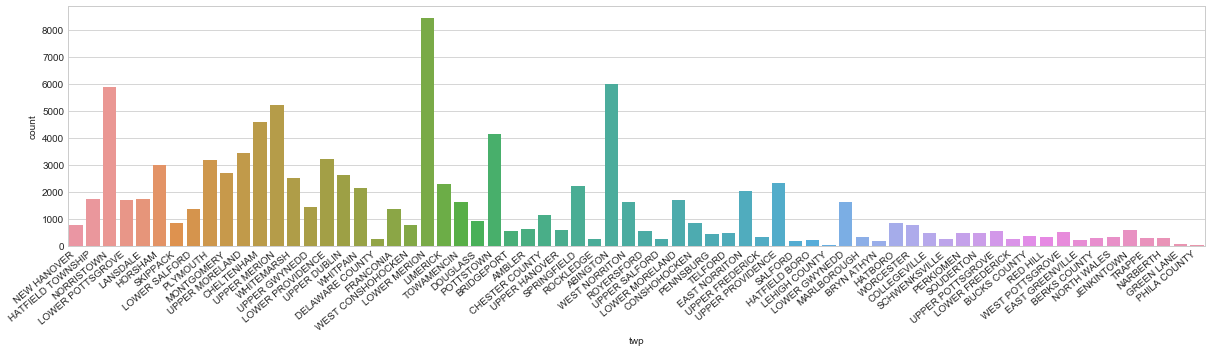

In [16]:
plt.figure(figsize=(17,5))
ax = sns.countplot(x='twp',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [17]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

* 911 calls from different zipcodes

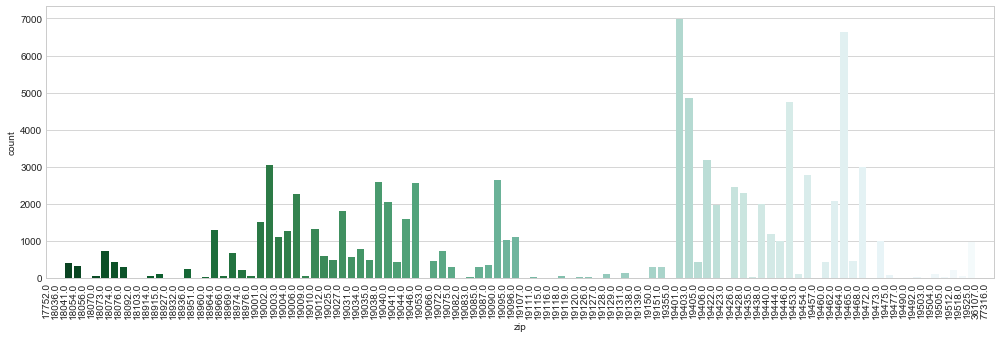

In [14]:
plt.figure(figsize=(17,5))
ax = sns.countplot(x='zip',data=df,palette='BuGn_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
#plt.tight_layout()
plt.show()

In [18]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### Extracting new features

In the titles column there are departments and emergency specified. We could extract which department addressed each call and store it in a separate column.

In [19]:
df['Department'] = df['title'].apply(lambda title: title.split(':')[0])

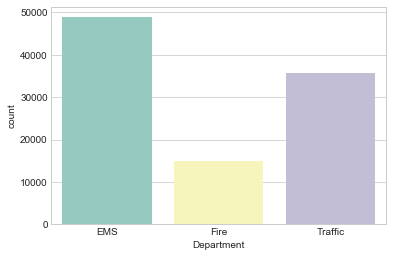

In [20]:
sns.countplot(x='Department',data=df,palette='Set3')

Extracting day, hour and month from `time` string

In [40]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day'] = df['timeStamp'].apply(lambda time: time.dayofweek)

#Mapping digits with their respective days
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df['Day'].map(daymap)

#Mapping digits with their respective months
#monthmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
#df['Month'] = df['Month'].map(monthmap)

Total number of calls received by each department by day

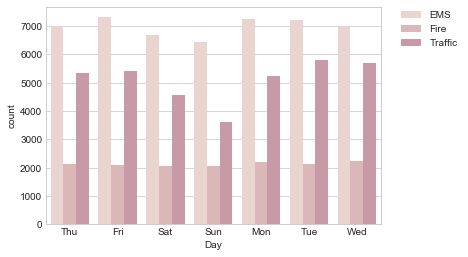

In [41]:
sns.countplot(x='Day', data=df,palette=sns.cubehelix_palette(8),hue='Department')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Total number of calls received by each department by month

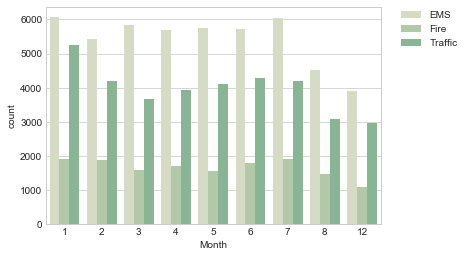

In [42]:
sns.countplot(x='Month', data=df,palette=sns.cubehelix_palette(8, start=.5, rot=-.75),hue='Department')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Normalizing the missing values for Sep, Oct, Nov months

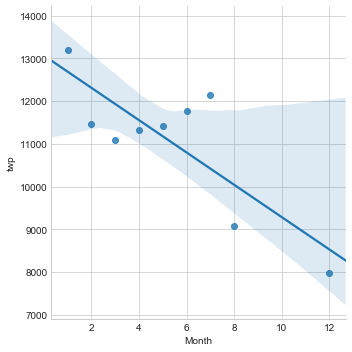

In [43]:
byMonth = df.groupby('Month').count()
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

Total number of calls by month

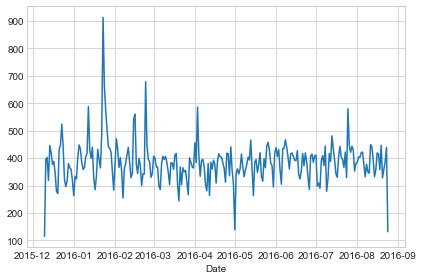

In [44]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Total number of calls EMS received by month

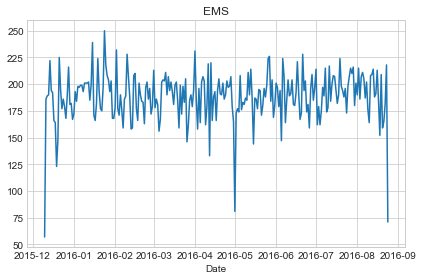

In [46]:
df[df['Department']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Total number of calls Fire department received by month

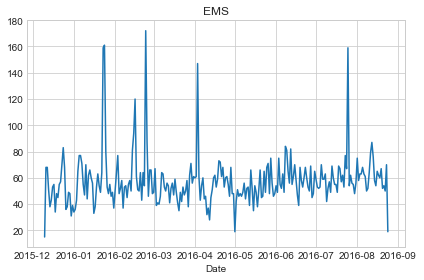

In [47]:
df[df['Department']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Total number of calls Traffic department received by month

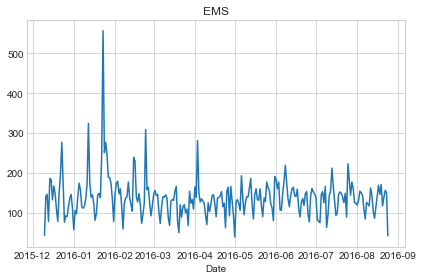

In [49]:
df[df['Department']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Heat map by day vs hour

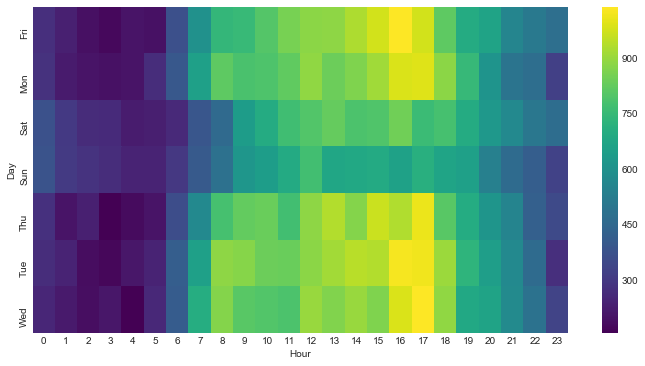

In [154]:
dayHour = df.groupby(by=['Day','Hour']).count()['Department'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

Heat map by day vs month

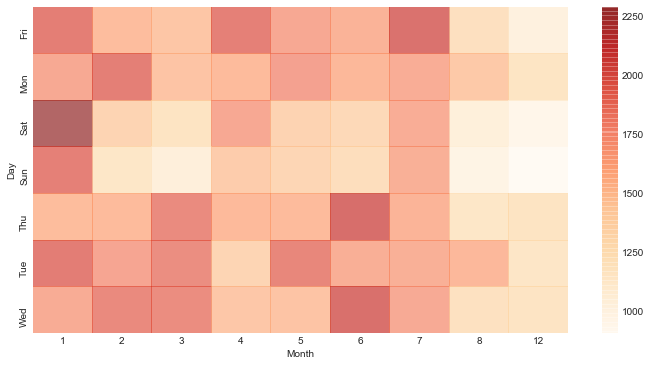

In [155]:
daymonth = df.groupby(by=['Day','Month']).count()['Department'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(daymonth,cmap='OrRd',alpha=0.6)

Fire department calls heat map hour vs day

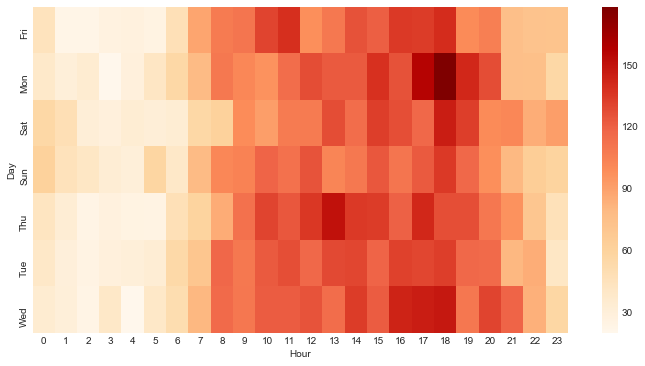

In [156]:
dayHour =df[df['Department']=='Fire'].groupby(by=['Day','Hour']).count()['Department'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='OrRd')

EMS calls heat map hour vs day

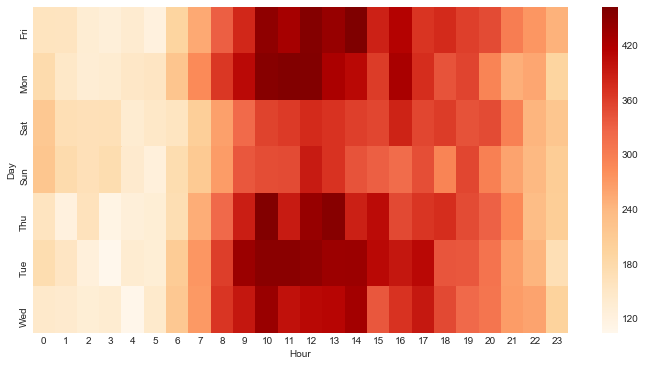

In [157]:
dayHour =df[df['Department']=='EMS'].groupby(by=['Day','Hour']).count()['Department'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='OrRd')

Traffic department calls heat map hour vs day

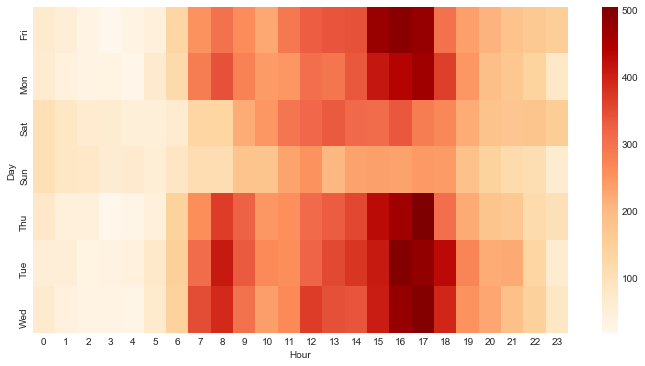

In [158]:
dayHour =df[df['Department']=='Traffic'].groupby(by=['Day','Hour']).count()['Department'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='OrRd')

Traffic department calls heat map month vs day

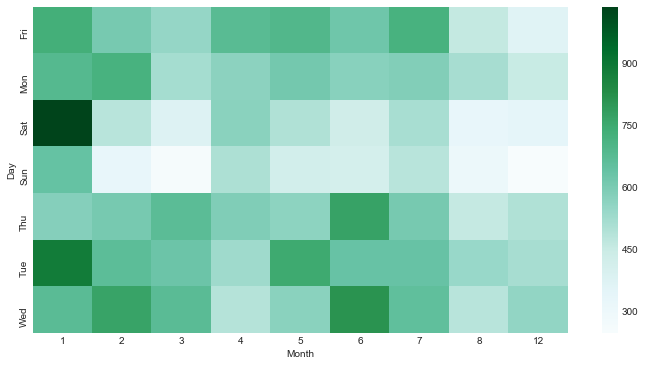

In [163]:
dayHour =df[df['Department']=='Traffic'].groupby(by=['Day','Month']).count()['Department'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='BuGn')

Fire department calls heat map month vs day

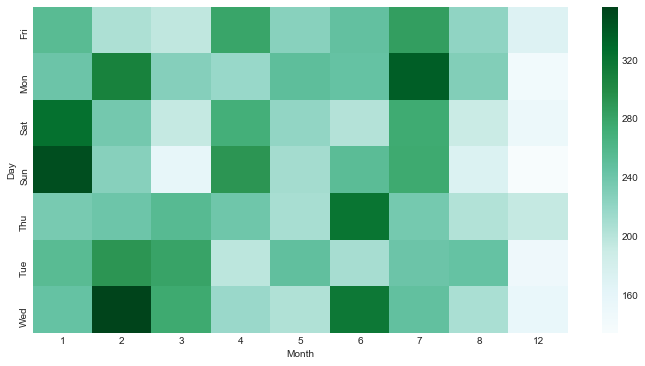

In [164]:
dayHour =df[df['Department']=='Fire'].groupby(by=['Day','Month']).count()['Department'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='BuGn')

EMS department calls heat map month vs day

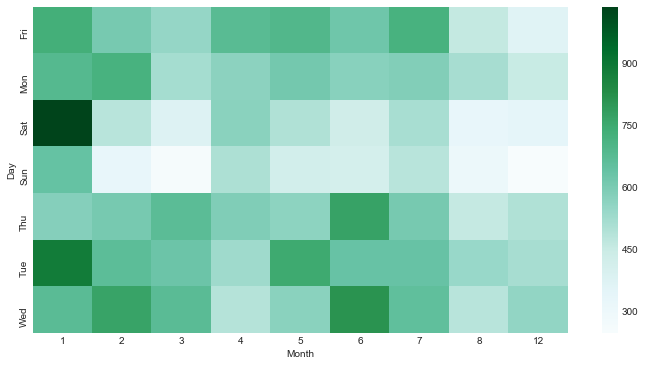

In [165]:
dayHour =df[df['Department']=='Traffic'].groupby(by=['Day','Month']).count()['Department'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='BuGn')